In [554]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Regresión Logística

## Titanic
Vamos a crear un modelo que prediga la probabilidad de supervivencia de los pasajeros

https://www.kaggle.com/c/titanic/data?select=train.csv

0. Importar data de training y testing. Agregarle a la tabla de testing la columna survived proveniente de la tabla gender_submission

In [ ]:
train = pd.read_csv('train.csv')

test = pd.read_csv('test.csv')

gender = pd.read_csv('gender_submission.csv')

test = pd.merge(test, gender, on='PassengerId', how='left')

1. Buscar columnas con valores nulos y cantidad de nulos en cada una. Fijarse el porcentaje de los datos nulos que representan sobre el total.

In [ ]:
train.isnull().sum()

total_celdas = len(train)
total_nulos = train.isnull().sum()
porcentaje_nulos = round((total_nulos / total_celdas) * 100,2)
porcentaje_nulos

test.isnull().sum()

total_celdas = len(test)
total_nulos = test.isnull().sum()
porcentaje_nulos = round((total_nulos / total_celdas) * 100,2)
porcentaje_nulos

test.isnull().sum()

2. En base al resultado anterior. Cuales columnas consideran que tienen sentido completar y cuales se deberían eliminar? Eliminar la que corresponda de la tabla de test y de train.

In [563]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

3. Completar valores nulos con el criterio que considres correcto en cada una de las columnas (que tengan sentido completar). Esto debe hacerse tanto en la tabla de training como la de testing (con el mismo criterio en ambas).

   Verificar como se distribuyen los valores de cada columna con un gráfico previamente para tener más herramientas en la decisión

<Axes: xlabel='Age', ylabel='Count'>

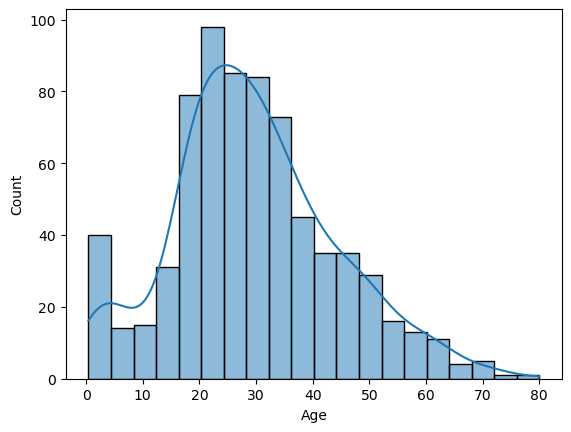

In [564]:
sns.histplot(train.Age,kde=True)

In [565]:
train.Age.fillna(round(train.Age.median(),0), inplace=True)

<Axes: xlabel='Embarked', ylabel='count'>

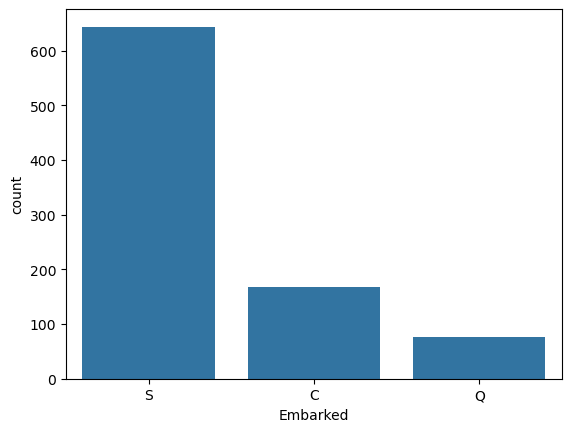

In [566]:
sns.countplot(x=train.Embarked)

In [567]:
train.Embarked.fillna(train.Age.mode(0), inplace=True)

<Axes: xlabel='Age', ylabel='Count'>

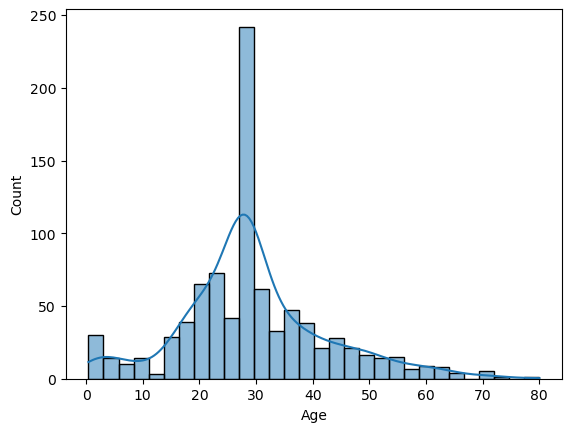

In [568]:
sns.histplot(train.Age,kde=True)

<Axes: xlabel='Embarked', ylabel='count'>

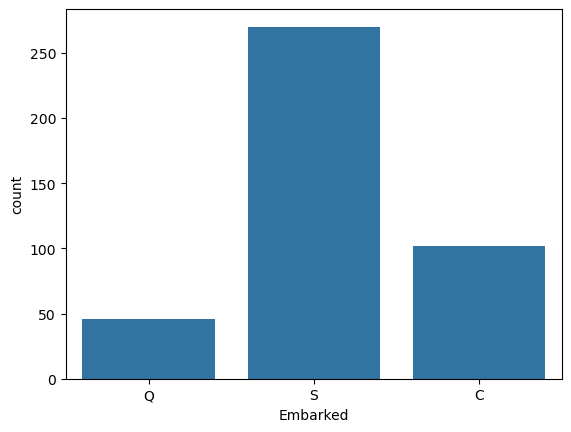

In [569]:
sns.countplot(x=test.Embarked)

In [570]:
test.Embarked.fillna(train.Age.mode(0), inplace=True)

In [571]:
test.Age.fillna(round(test.Age.median(),0), inplace=True)

<Axes: xlabel='Fare', ylabel='Count'>

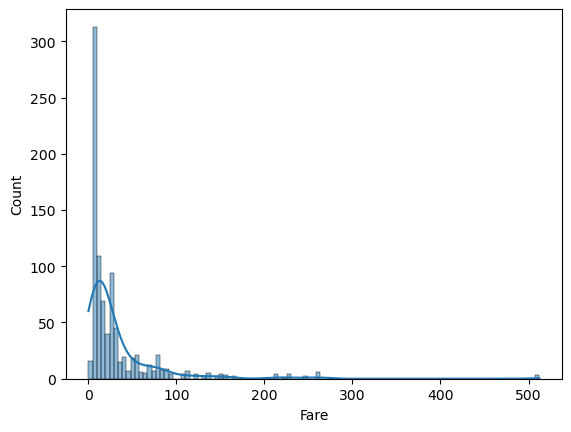

In [572]:
sns.histplot(train.Fare,kde=True)

In [573]:
test.loc[test.Fare.isnull(),:]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,0


In [574]:
FareMedian3class = test.loc[test.Pclass == 3,'Fare'].mean()

In [575]:
test.Fare.fillna(FareMedian3class, inplace=True)

4. Realizar análisis exploratorio. Graficar las personas que sobrevivieron por:
    - Clase (Pclass)
    - Sexo (Sex)
    - Costo de boleto (Fare)

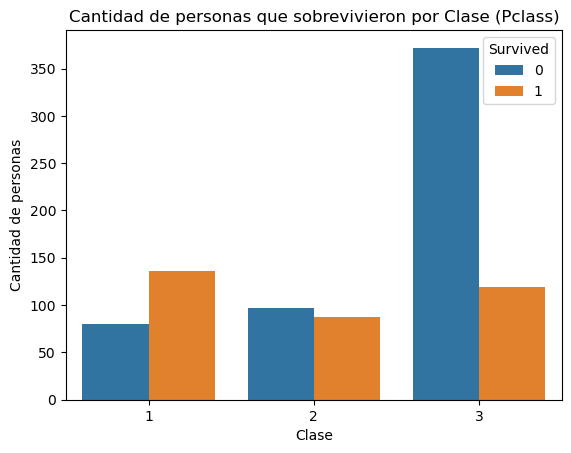

In [576]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Cantidad de personas que sobrevivieron por Clase (Pclass)')
plt.xlabel('Clase')
plt.ylabel('Cantidad de personas')
plt.show()

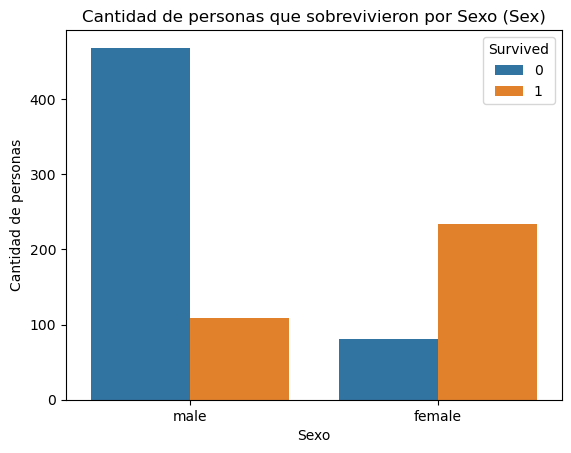

In [577]:
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Cantidad de personas que sobrevivieron por Sexo (Sex)')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de personas')
plt.show()

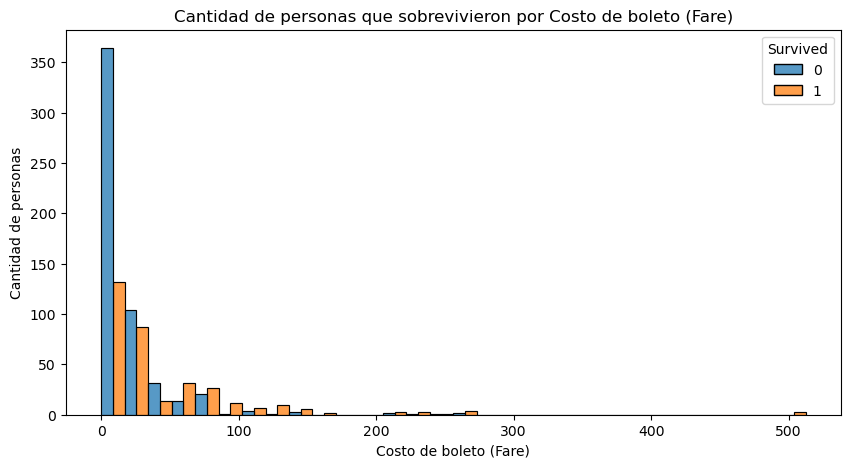

In [578]:
plt.figure(figsize=(10, 5))
sns.histplot(x='Fare', hue='Survived', data=train, bins=30, multiple='dodge')
plt.title('Cantidad de personas que sobrevivieron por Costo de boleto (Fare)')
plt.xlabel('Costo de boleto (Fare)')
plt.ylabel('Cantidad de personas')
plt.show()

5. Verificar columnas del DataFrame e identificar sobre cuales se deberían generar variables dummies.
   Generar columnas de dummies sobre "Pclass","Embarked" y "Sex". Aplicar cambios en training y testing

In [579]:
for i in train.columns:
    print(f'{i}: {type(train[i][0])}')

PassengerId: <class 'numpy.int64'>
Survived: <class 'numpy.int64'>
Pclass: <class 'numpy.int64'>
Name: <class 'str'>
Sex: <class 'str'>
Age: <class 'numpy.float64'>
SibSp: <class 'numpy.int64'>
Parch: <class 'numpy.int64'>
Ticket: <class 'str'>
Fare: <class 'numpy.float64'>
Embarked: <class 'str'>


In [580]:
train = pd.get_dummies(
    train, 
    columns=["Sex",'Embarked','Pclass'],
    drop_first = True
)


In [581]:
train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True,False,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True,False,True


In [582]:
test = pd.get_dummies(
    test, 
    columns=["Sex",'Embarked','Pclass'],
    drop_first = True
)


In [583]:
test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Survived,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0,True,True,False,False,True
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,1,False,False,True,False,True
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,0,True,True,False,True,False
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,0,True,False,True,False,True
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,1,False,False,True,False,True


6. Eliminar columnas del dataset que considere que no suman al modelo. Hacerlo en testing y training

In [584]:
train.drop('Name', axis=1, inplace=True)
train.drop('Ticket', axis=1, inplace=True)

In [585]:
X_train = train.loc[:,train.columns != 'Survived']
y_train = train.loc[:,'Survived']
X_train.head()

,PassengerId,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,22.0,1,0,7.2500,True,False,True,False,True
1,2,38.0,1,0,71.2833,False,False,False,False,False
2,3,26.0,0,0,7.9250,False,False,True,False,True
3,4,35.0,1,0,53.1000,False,False,True,False,False
4,5,35.0,0,0,8.0500,True,False,True,False,True


In [586]:
lr = LogisticRegression(max_iter=1000000)
rfe = RFE(lr, n_features_to_select=7)
rfe = rfe.fit(X_train, y_train)
tabla_columnas = pd.DataFrame({
    "columna": X_train.columns, 
    "SeQueda": rfe.support_,
    "Posicion": rfe.ranking_
})
tabla_columnas.sort_values("Posicion")

,columna,SeQueda,Posicion
2,SibSp,True,1
3,Parch,True,1
5,Sex_male,True,1
6,Embarked_Q,True,1
7,Embarked_S,True,1
8,Pclass_2,True,1
9,Pclass_3,True,1
1,Age,False,2
4,Fare,False,3
0,PassengerId,False,4


In [587]:
selected_features = X_train.columns[rfe.support_]
X_train_final = X_train[selected_features]

In [588]:
test.drop('Name', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

In [589]:
X_test = test.loc[:,test.columns != 'Survived']
y_test = test.loc[:,'Survived']
lr = LogisticRegression(max_iter=1000000)
rfe = RFE(lr, n_features_to_select=7)
rfe = rfe.fit(X_test, y_test)
tabla_columnas = pd.DataFrame({
    "columna": X_train.columns, 
    "SeQueda": rfe.support_,
    "Posicion": rfe.ranking_
})
tabla_columnas.sort_values("Posicion")

,columna,SeQueda,Posicion
2,SibSp,True,1
3,Parch,True,1
5,Sex_male,True,1
6,Embarked_Q,True,1
7,Embarked_S,True,1
8,Pclass_2,True,1
9,Pclass_3,True,1
1,Age,False,2
4,Fare,False,3
0,PassengerId,False,4


In [590]:
selected_features = X_test.columns[rfe.support_]
X_test_final = X_test[selected_features]

7. Agregar una columna llamada "IsMinor" que sea 1 en caso de tener 16 años o menos y 0 en caso contrario. Hacerlo para testing y training

In [591]:
# For X_train_final
X_train_final = X_train_final.assign(IsMinor=X_train['Age'].apply(lambda x: 1 if x <= 16 else 0))

# For X_test_final
X_test_final = X_test_final.assign(IsMinor=X_test['Age'].apply(lambda x: 1 if x <= 16 else 0))

8. Ajustar modelo considerando todas las variables del dataset de training.

In [592]:
modelo = LogisticRegression(max_iter=10000)
modelo.fit(X_train_final,y_train)

LogisticRegression(max_iter=10000)

9. Validar el modelo con datos de testing, agregar dos columnas a test_data:
    * predicción: valor 0 o 1
    * probabilidad_prediccion: valor de la probabilidad devuelta por el modelo

In [593]:
y_pred = modelo.predict(X_test_final)
y_pred_prov = modelo.predict_proba(X_test_final)[:,1]

10. Calcular matriz de confusión

In [594]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [595]:
matriz_confusion = confusion_matrix(y_test, y_pred)
matriz_confusion

array([[251,  15],
       [ 16, 136]], dtype=int64)

In [596]:
TN = matriz_confusion[0][0]
TP = matriz_confusion[1][1]
FN = matriz_confusion[1][0]
FP = matriz_confusion[0][1]

11. Calcular Accuracy

In [597]:
(TN + TP) / (TN + TP + FN + FP)

0.9258373205741627

12. Calcular sensibilidad

In [598]:
TP / (TP + FN)

0.8947368421052632

13. Calcular especificidad

In [599]:
TN / (TN + FP)

0.943609022556391

14. Graficar curva de ROC

In [600]:
especificidad_inv, sensibilidad, threshold = roc_curve(y_test, y_pred_prov)

In [601]:
print(f"Threshold = {threshold[11]}")
print(f"Sensibilidad = {sensibilidad[11]}")
print(f"Especificidad = {1-especificidad_inv[11]}")

Threshold = 0.8744116619433138
Sensibilidad = 0.27631578947368424
Especificidad = 1.0


<Axes: >

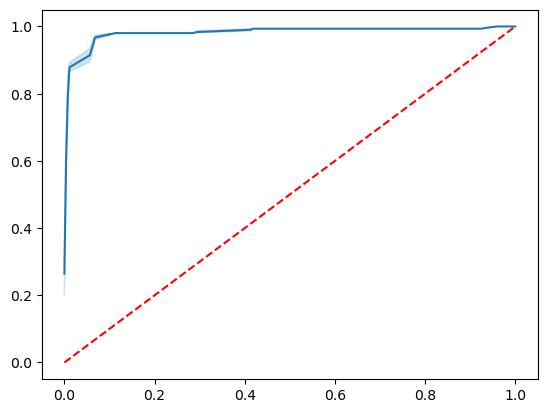

In [602]:
recta_x = [i * 0.01 for i in range(101)]
recta_y = recta_x
sns.lineplot(x = especificidad_inv, y = sensibilidad)
sns.lineplot(x = recta_x, y = recta_y, ls = "--", c = "r")

15. Calcular valor de área bajo la curva de ROC

In [603]:
roc_auc_score(y_test, y_pred_prov)

0.9815740007914523